In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

import warnings
warnings.filterwarnings("ignore")

In [27]:
path = r'data/Womens Clothing E-Commerce Reviews.csv'
data = pd.read_csv(path, index_col="Unnamed: 0")

In [28]:
print(f"{data.info()}")
print(f"데이터 결측값 :\n{data.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB
None
데이터 결측값 :
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               

In [30]:
# Review Text 결측값 제거
df_clean = data[~data['Review Text'].isnull()]

In [36]:
## title 정보 확인

# 'Title'의 결측값을 삭제합니다.
df_clean_title = df_clean[~df_clean['Title'].isnull()]

# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_clean_title['Title'].str.lower().str.cat(sep=' ')) 

In [37]:
# nltk에서 지원하는 'stopwords'를 다운받습니다.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user1229\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [52]:
# 영어 'stopwords'를 가져옵니다.
en_stops = set(stopwords.words('english'))

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 "i'm",
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 "5'8",
 'love',
 'length',
 'hits',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',

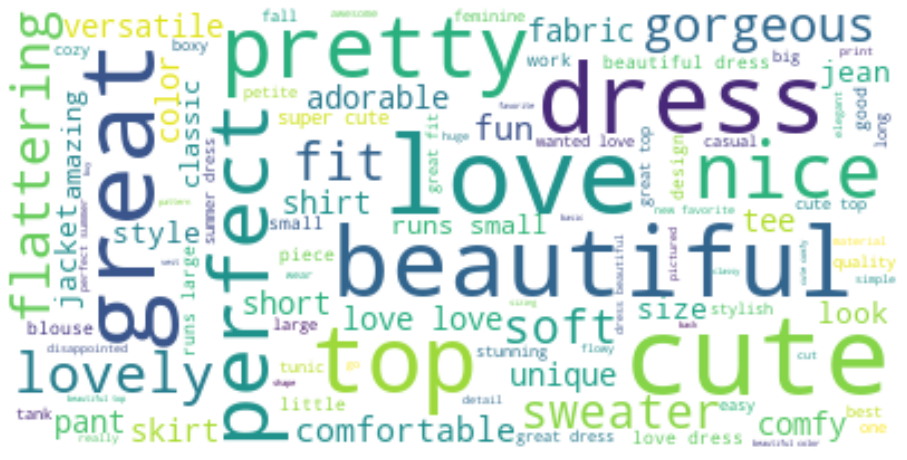

In [39]:
# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(filtered_sentence))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

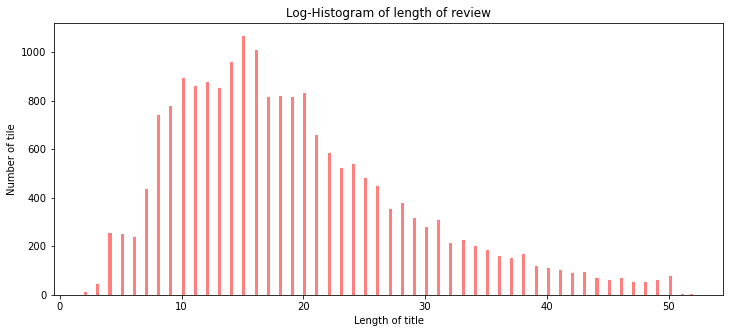

In [60]:
# title 평균 단어 수
plt.figure(figsize=(12,5))

plt.hist([len(words) for words in df_clean_title['Title']], bins=200, alpha=0.5, color='r', label='word')
# plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of title')
plt.ylabel('Number of tile')
plt.show()

In [40]:
## Review Text 정보 확인

# findall 함수를 사용하여 띄어 쓰기 단위로 글자만을 가져옵니다.(소문자로 변환도 수행)
tokens = re.findall("[\w']+", df_clean['Review Text'].str.lower().str.cat(sep=' ')) 

# tokens에서 'stopwords'에 해당되지 않는 단어를 골라내어 filtered_sentence에 저장합니다.
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 "i'm",
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 "5'8",
 'love',
 'length',
 'hits',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',

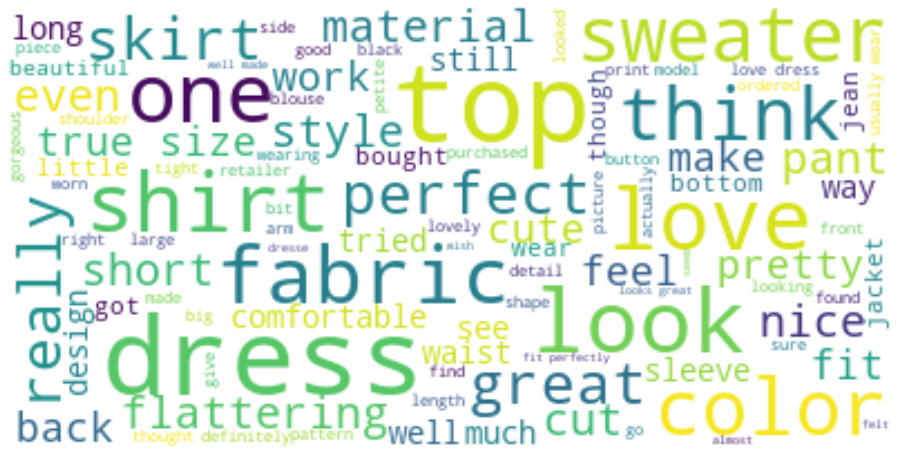

In [41]:
# 출력 사이즈를 설정합니다.
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장합니다.
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filtered_sentence))

# wordcloud를 출력합니다.
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

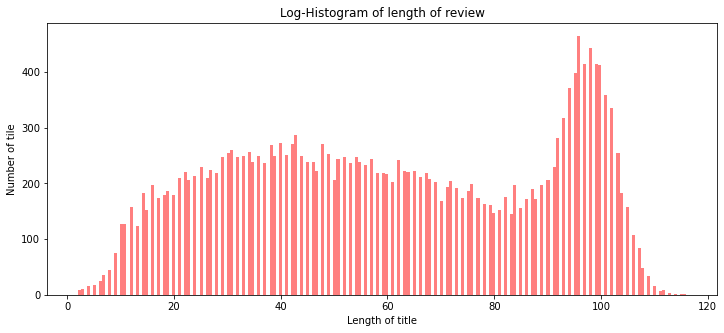

In [82]:
# review 평균 단어 수
plt.figure(figsize=(12,5))

clean_review = [re.findall("[\w']+", row) for row in df_clean['Review Text'].str.lower()]
plt.hist([len(words) for words in clean_review], bins=200, alpha=0.5, color='r', label='word')
# plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of title')
plt.ylabel('Number of tile')
plt.show()